In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


import warnings
warnings.simplefilter("ignore")

In [14]:
df=pd.read_csv("D:\\ExcelR Data Science\\Assignments\\SVM\\forestfires.csv")

In [15]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [16]:
df.loc[1]

month              oct
day                tue
FFMC              90.6
DMC               35.4
DC               669.1
ISI                6.7
temp              18.0
RH                  33
wind               0.9
rain               0.0
area               0.0
dayfri               0
daymon               0
daysat               0
daysun               0
daythu               0
daytue               1
daywed               0
monthapr             0
monthaug             0
monthdec             0
monthfeb             0
monthjan             0
monthjul             0
monthjun             0
monthmar             0
monthmay             0
monthnov             0
monthoct             1
monthsep             0
size_category    small
Name: 1, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.shape

(517, 31)

<AxesSubplot:xlabel='month', ylabel='rain'>

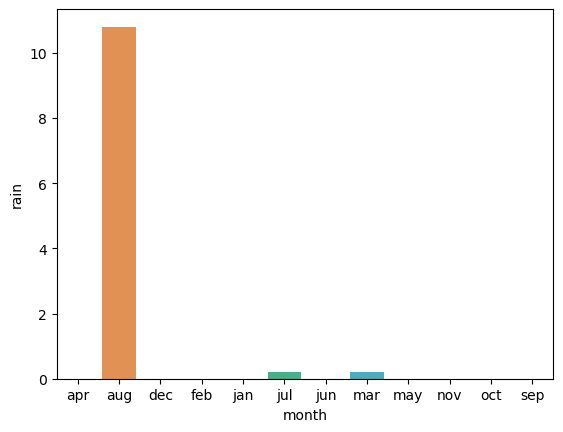

In [24]:
sns.barplot(x='month',y='rain',data=df.groupby('month').sum()['rain'].reset_index())

In [25]:
# we can drop month day features as it is already encoded with OneHot Coder
df=df.drop(['month','day'],axis=1)

In [ ]:
df.head()

In [26]:
le=LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])

In [28]:
x=df.drop('size_category',axis=1)

In [29]:
y=df['size_category']

In [30]:
sd=StandardScaler()
x=sd.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [35]:

svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(x_train, y_train)
svc_pred=svc_model.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.37      0.93      0.53        14
           1       0.99      0.81      0.89       116

    accuracy                           0.82       130
   macro avg       0.68      0.87      0.71       130
weighted avg       0.92      0.82      0.85       130

ConfusionMatrix:
 [[13  1]
 [22 94]]
Accuracy:
 0.82%


In [36]:
#RBF Kernel in SVM
svc_model_rbf = SVC(C=.1, kernel='rbf')
svc_model_rbf.fit(x_train, y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred_rbf,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred_rbf,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred_rbf,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.84       130

    accuracy                           0.73       130
   macro avg       0.50      0.37      0.42       130
weighted avg       1.00      0.73      0.84       130

ConfusionMatrix:
 [[ 0  0]
 [35 95]]
Accuracy:
 0.73%


In [38]:
#Polynomial Kernel in SVM
svc_model_poly = SVC(C=.1, kernel='poly')
svc_model_poly.fit(x_train, y_train)
svc_pred_poly=svc_model_rbf.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred_poly,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred_poly,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred_poly,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.84       130

    accuracy                           0.73       130
   macro avg       0.50      0.37      0.42       130
weighted avg       1.00      0.73      0.84       130

ConfusionMatrix:
 [[ 0  0]
 [35 95]]
Accuracy:
 0.73%


In [40]:
# Comparing with other classification models

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print("ClassificationReport:\n",classification_report(lr_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(lr_pred,y_test))
print("Accuracy:","{:.2f}%".format(accuracy_score(lr_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.57      0.91      0.70        22
           1       0.98      0.86      0.92       108

    accuracy                           0.87       130
   macro avg       0.78      0.89      0.81       130
weighted avg       0.91      0.87      0.88       130

ConfusionMatrix:
 [[20  2]
 [15 93]]
Accuracy: 0.87%


In [41]:
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
ds_pred=ds.predict(x_test)

print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(ds_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        95

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Confusion Matrix:
 [[35  0]
 [ 0 95]]
Accuracy: 1.00%


In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(rf_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        95

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Confusion Matrix:
 [[35  0]
 [ 0 95]]
Accuracy: 1.00%


In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

print('Classification Report:\n',classification_report(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(knn_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.17      0.24        35
           1       0.75      0.89      0.81        95

    accuracy                           0.70       130
   macro avg       0.56      0.53      0.52       130
weighted avg       0.65      0.70      0.66       130

Confusion Matrix:
 [[ 6 29]
 [10 85]]
Accuracy: 0.70%


In [44]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

#Evaluation
print("ClassificationReport:\n",classification_report(gnb_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(gnb_pred,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(gnb_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.96      0.95      0.95        96

    accuracy                           0.93       130
   macro avg       0.91      0.92      0.91       130
weighted avg       0.93      0.93      0.93       130

ConfusionMatrix:
 [[30  4]
 [ 5 91]]
Accuracy:
 0.93%


In [45]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)

print('Classification Report:\n',classification_report(y_test,xg_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,xg_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(xg_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        95

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Confusion Matrix:
 [[35  0]
 [ 0 95]]
Accuracy: 1.00%


In [46]:
model=['Logistic','NaiveBayes','DecisiionTree','RandomForest','KNNClassifier','XGBOOST','Support Vector Machine_Linear Kernal',
      'Support Vector Machine_RBF Kernal','Support Vector Machine_Polynomial Kernal']
accuracy=[accuracy_score(y_test,lr_pred),accuracy_score(gnb_pred,y_test),accuracy_score(y_test,ds_pred),
          accuracy_score(y_test,rf_pred),accuracy_score(y_test,knn_pred),accuracy_score(xg_pred,y_test),
          accuracy_score(svc_pred,y_test),accuracy_score(svc_pred_rbf,y_test),accuracy_score(svc_pred_poly,y_test)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [47]:
acc.sort_values('Accuracy',ascending=False)

,MLModel,Accuracy
2,DecisiionTree,1.000000
3,RandomForest,1.000000
5,XGBOOST,1.000000
1,NaiveBayes,0.930769
0,Logistic,0.869231
6,Support Vector Machine_Linear Kernal,0.823077
7,Support Vector Machine_RBF Kernal,0.730769
8,Support Vector Machine_Polynomial Kernal,0.730769
4,KNNClassifier,0.700000
